# Temperature Forecast Project

In [329]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


# Import Dataset

In [330]:
df=pd.read_csv("forecast.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [331]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [332]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [333]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4128,4.0,10-08-2015,32.2,23.9,49.085342,98.059288,30.346013,22.492453,5.061544,108.724448,...,0.000000,1.732264,0.0,37.6450,127.022,45.7160,2.5348,5148.043945,32.4,23.6
4059,10.0,07-08-2015,34.7,23.4,74.434380,95.721207,27.965368,23.748153,7.079189,48.488982,...,4.878638,0.073992,0.0,37.4562,126.955,208.5070,5.1782,5209.735352,32.4,23.0
5263,14.0,24-07-2016,29.8,27.2,65.384422,91.046288,29.825803,26.636870,5.699928,24.907668,...,0.098012,1.399223,0.0,37.4967,126.927,30.9680,0.6180,5545.184570,32.7,26.1
2608,9.0,11-08-2014,27.7,18.3,56.065887,95.192764,28.070704,21.878241,6.176550,94.887962,...,0.000000,0.000000,0.0,37.4967,126.826,50.9312,0.4125,5140.238281,30.6,21.7
2887,13.0,22-08-2014,28.7,21.3,57.667500,89.697884,28.071188,23.829236,6.105302,22.576033,...,0.007379,0.000000,0.0,37.5776,127.083,59.8324,2.6865,4741.140137,29.8,23.6


# Exploratory Data Analysis

In [334]:
df.shape

(7752, 25)

In [335]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [337]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

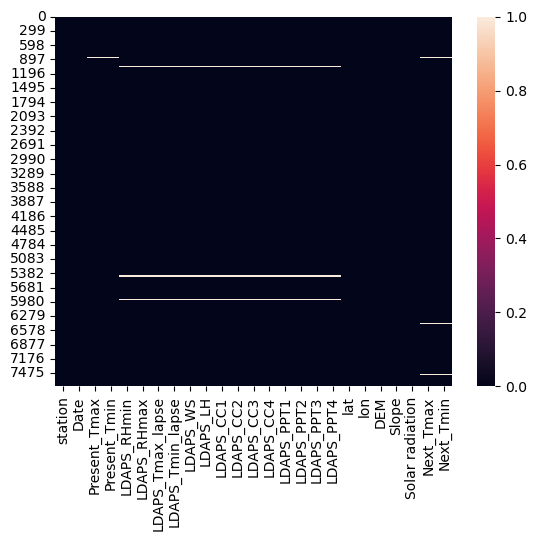

In [338]:
sns.heatmap(df.isnull())

In [339]:
# Droping the null values
df=df.dropna()

In [340]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [341]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


In [342]:
# We taking another dataframe for countplot doing in year and month wise 
df1=df.copy()

In [343]:
df1['Date']=pd.to_datetime(df1['Date'])

In [344]:
# Splited Date column into day, month ,year
df1['Day']=df1['Date'].apply(lambda x:x.day)
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Year']=df1['Date'].apply(lambda x:x.year)
df1.sample(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
6282,8.0,2017-03-07,26.8,22.9,48.850651,94.458771,31.446149,21.928993,6.346656,89.964801,...,37.4697,126.910,52.5180,1.5629,5845.816895,30.7,23.4,7,3,2017
6001,2.0,2016-08-23,31.8,23.9,52.643738,77.528809,30.802098,25.759475,5.323883,58.346507,...,37.6046,127.032,44.7624,0.5141,4694.338379,32.1,25.6,23,8,2016
4338,14.0,2015-08-18,32.6,24.8,51.308941,78.123306,29.864045,24.984517,5.306004,15.141767,...,37.4967,126.927,30.9680,0.6180,4891.187012,31.3,24.5,18,8,2015


In [345]:
# Droping the date column
df1.drop(columns=['Date'],axis=1, inplace=True)

In [346]:
df=df1.copy()

In [347]:
df.sample(3)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
7028,4.0,32.9,26.6,50.227451,95.930145,32.179793,25.231961,6.591446,159.596667,0.278770,...,37.6450,127.022,45.7160,2.5348,5365.759277,35.7,27.0,8,2,2017
407,8.0,29.1,26.2,63.418846,96.144966,28.117635,22.481146,10.464307,67.966578,0.871631,...,37.4697,126.910,52.5180,1.5629,5704.723633,26.3,23.3,16,7,2013
4391,17.0,27.0,21.3,65.414024,96.730743,27.054613,21.873297,4.257748,84.839767,0.750292,...,37.6181,127.099,53.4712,0.6970,4836.728027,29.1,22.1,20,8,2015


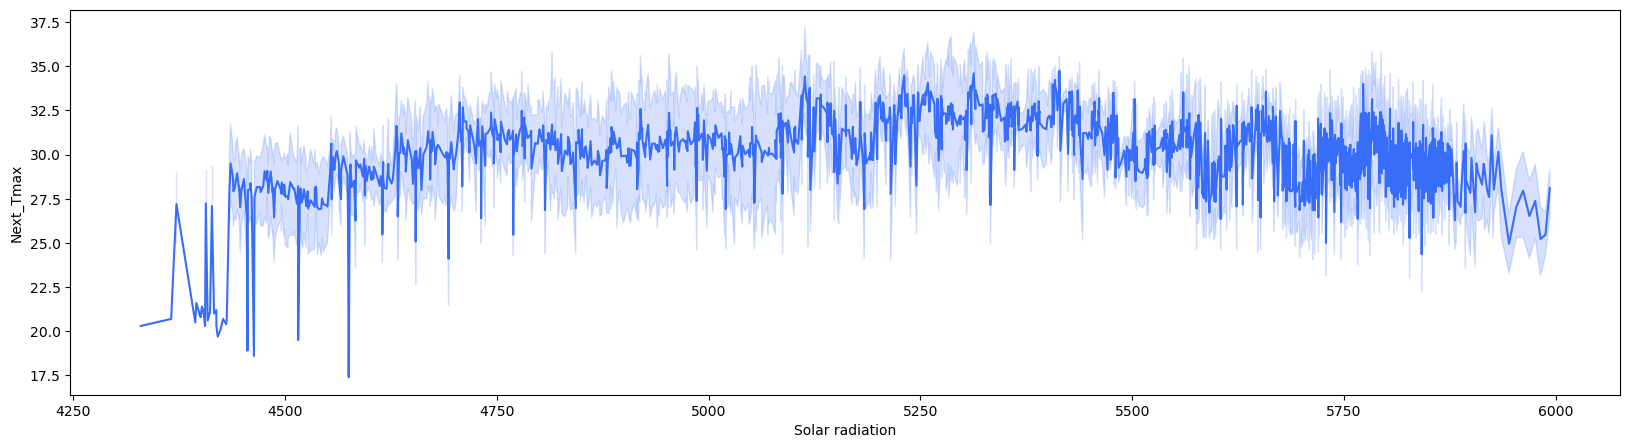

In [348]:
# Relation between Solar radiation and Next_Tmax
plt.figure(figsize=(20,5))
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

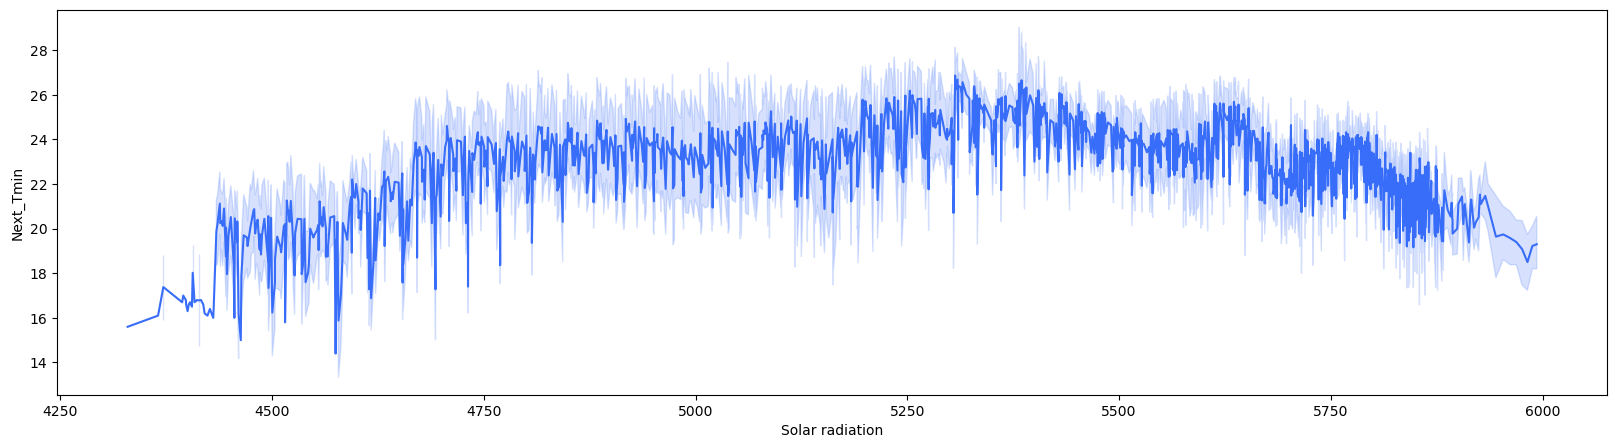

In [349]:
# Relation between Solar radiation and Next_Tmin
plt.figure(figsize=(20,5))
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

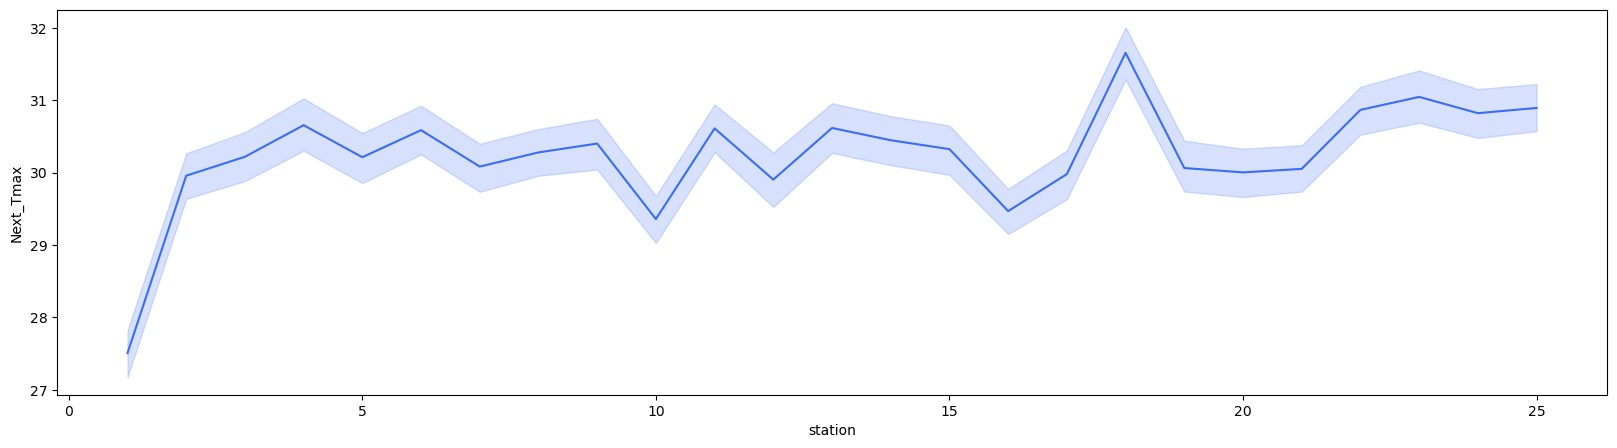

In [350]:
# Relation between Station and Next_Tmax
plt.figure(figsize=(20,5))
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

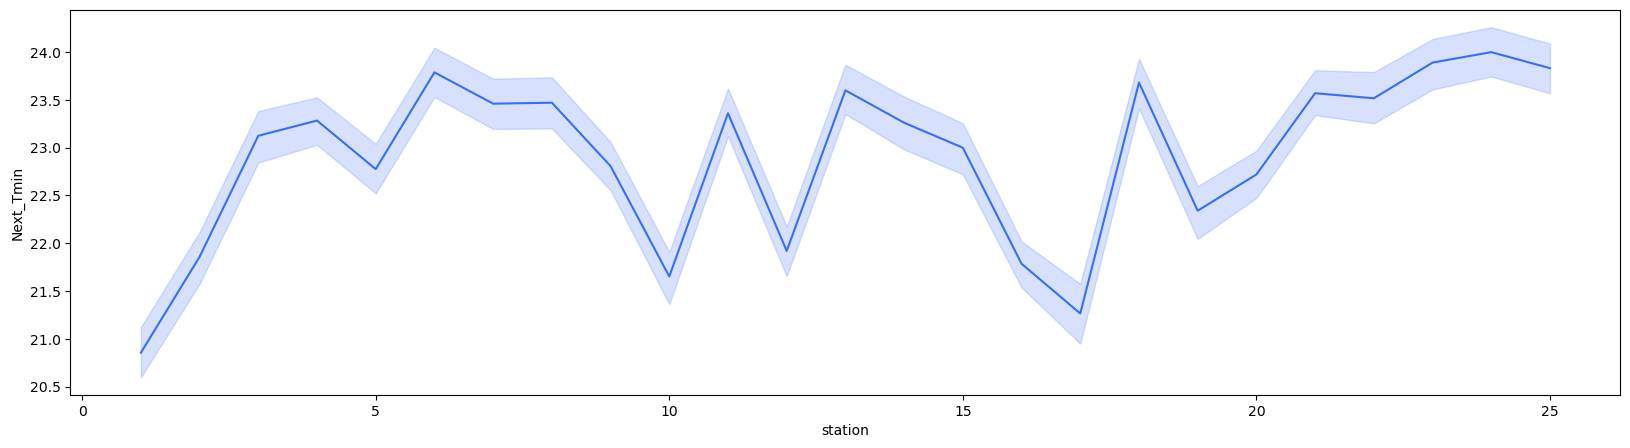

In [351]:
# Relation between Station and Next_Tmin
plt.figure(figsize=(20,5))
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

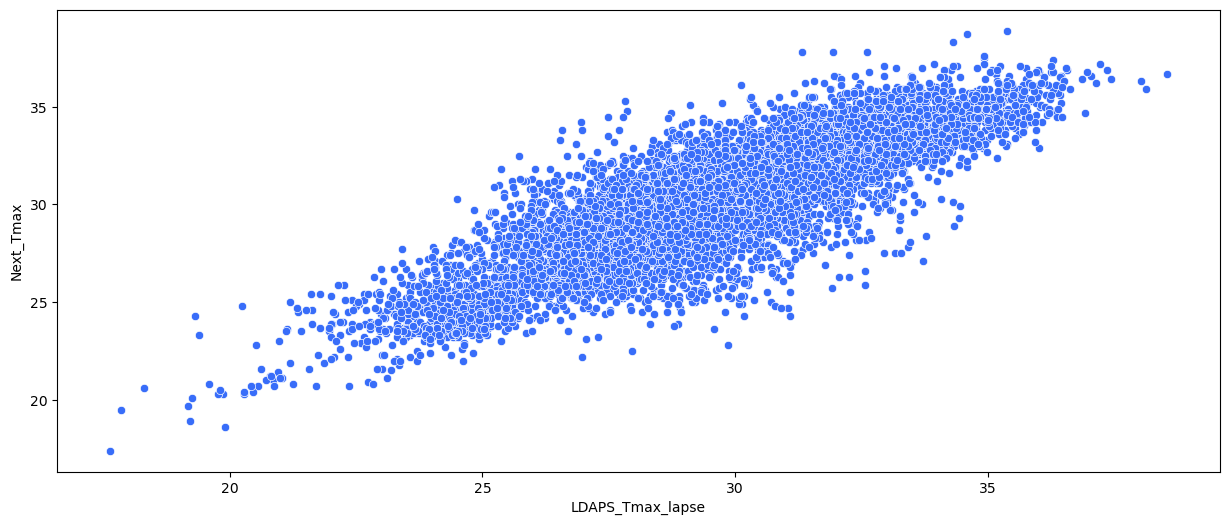

In [352]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="LDAPS_Tmax_lapse", y="Next_Tmax", data=df)
plt.show()

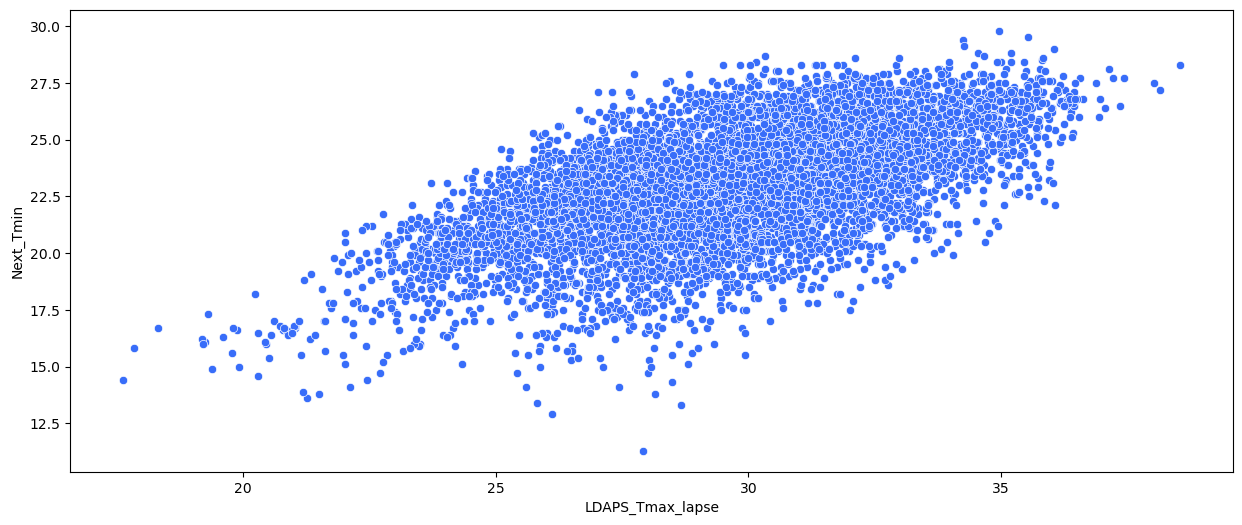

In [353]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="LDAPS_Tmax_lapse", y="Next_Tmin", data=df)
plt.show()

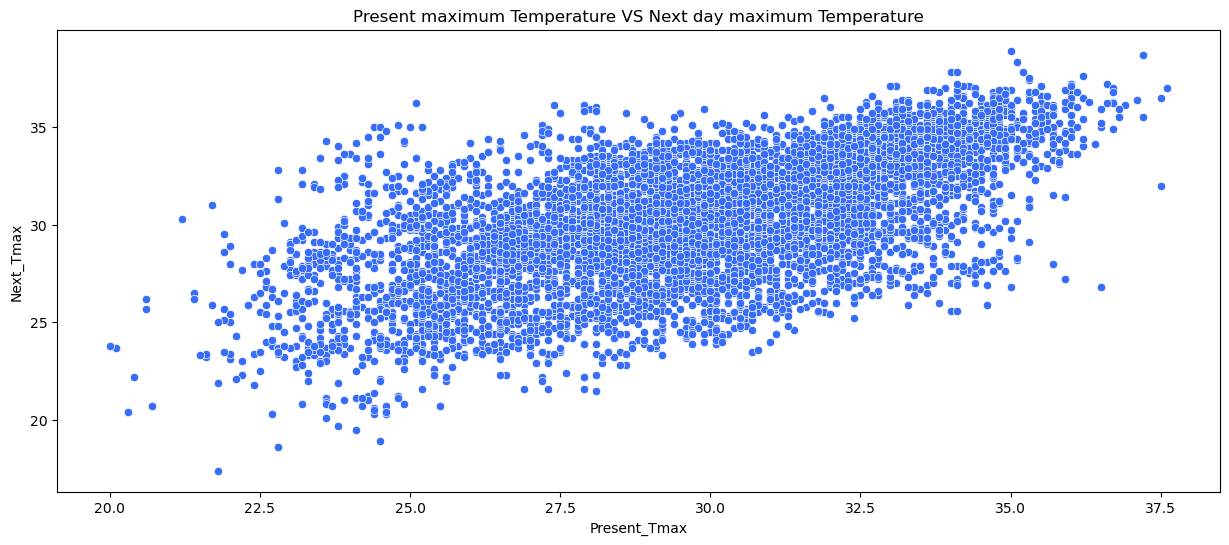

In [354]:
# Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(15,6))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(x="Present_Tmax", y="Next_Tmax", data=df)
plt.show()

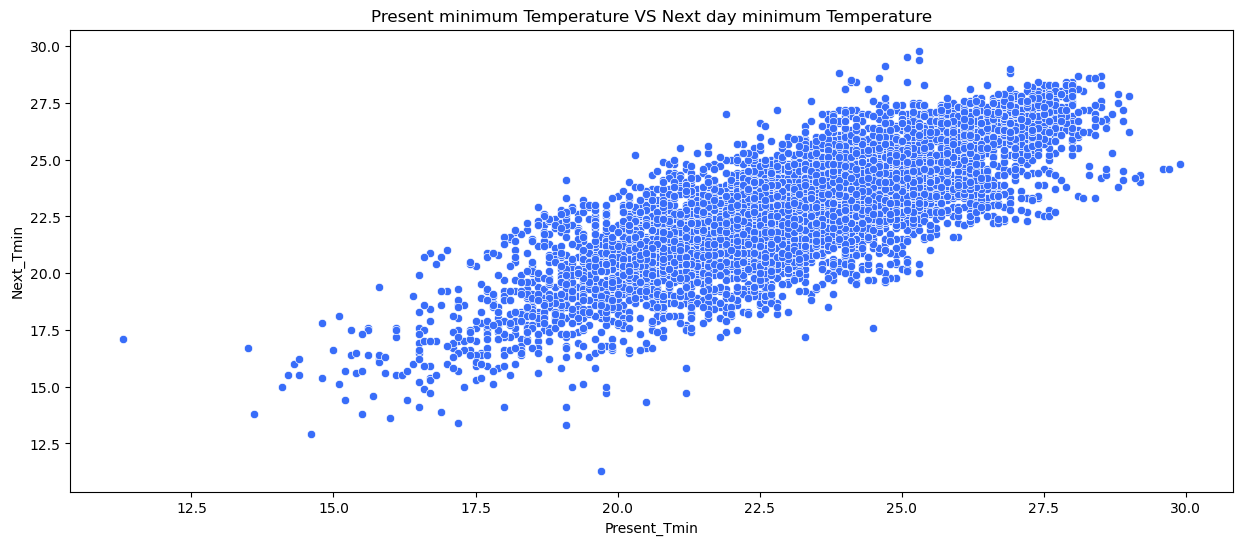

In [355]:
# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(15,6))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(x="Present_Tmin", y="Next_Tmin", data=df)
plt.show()

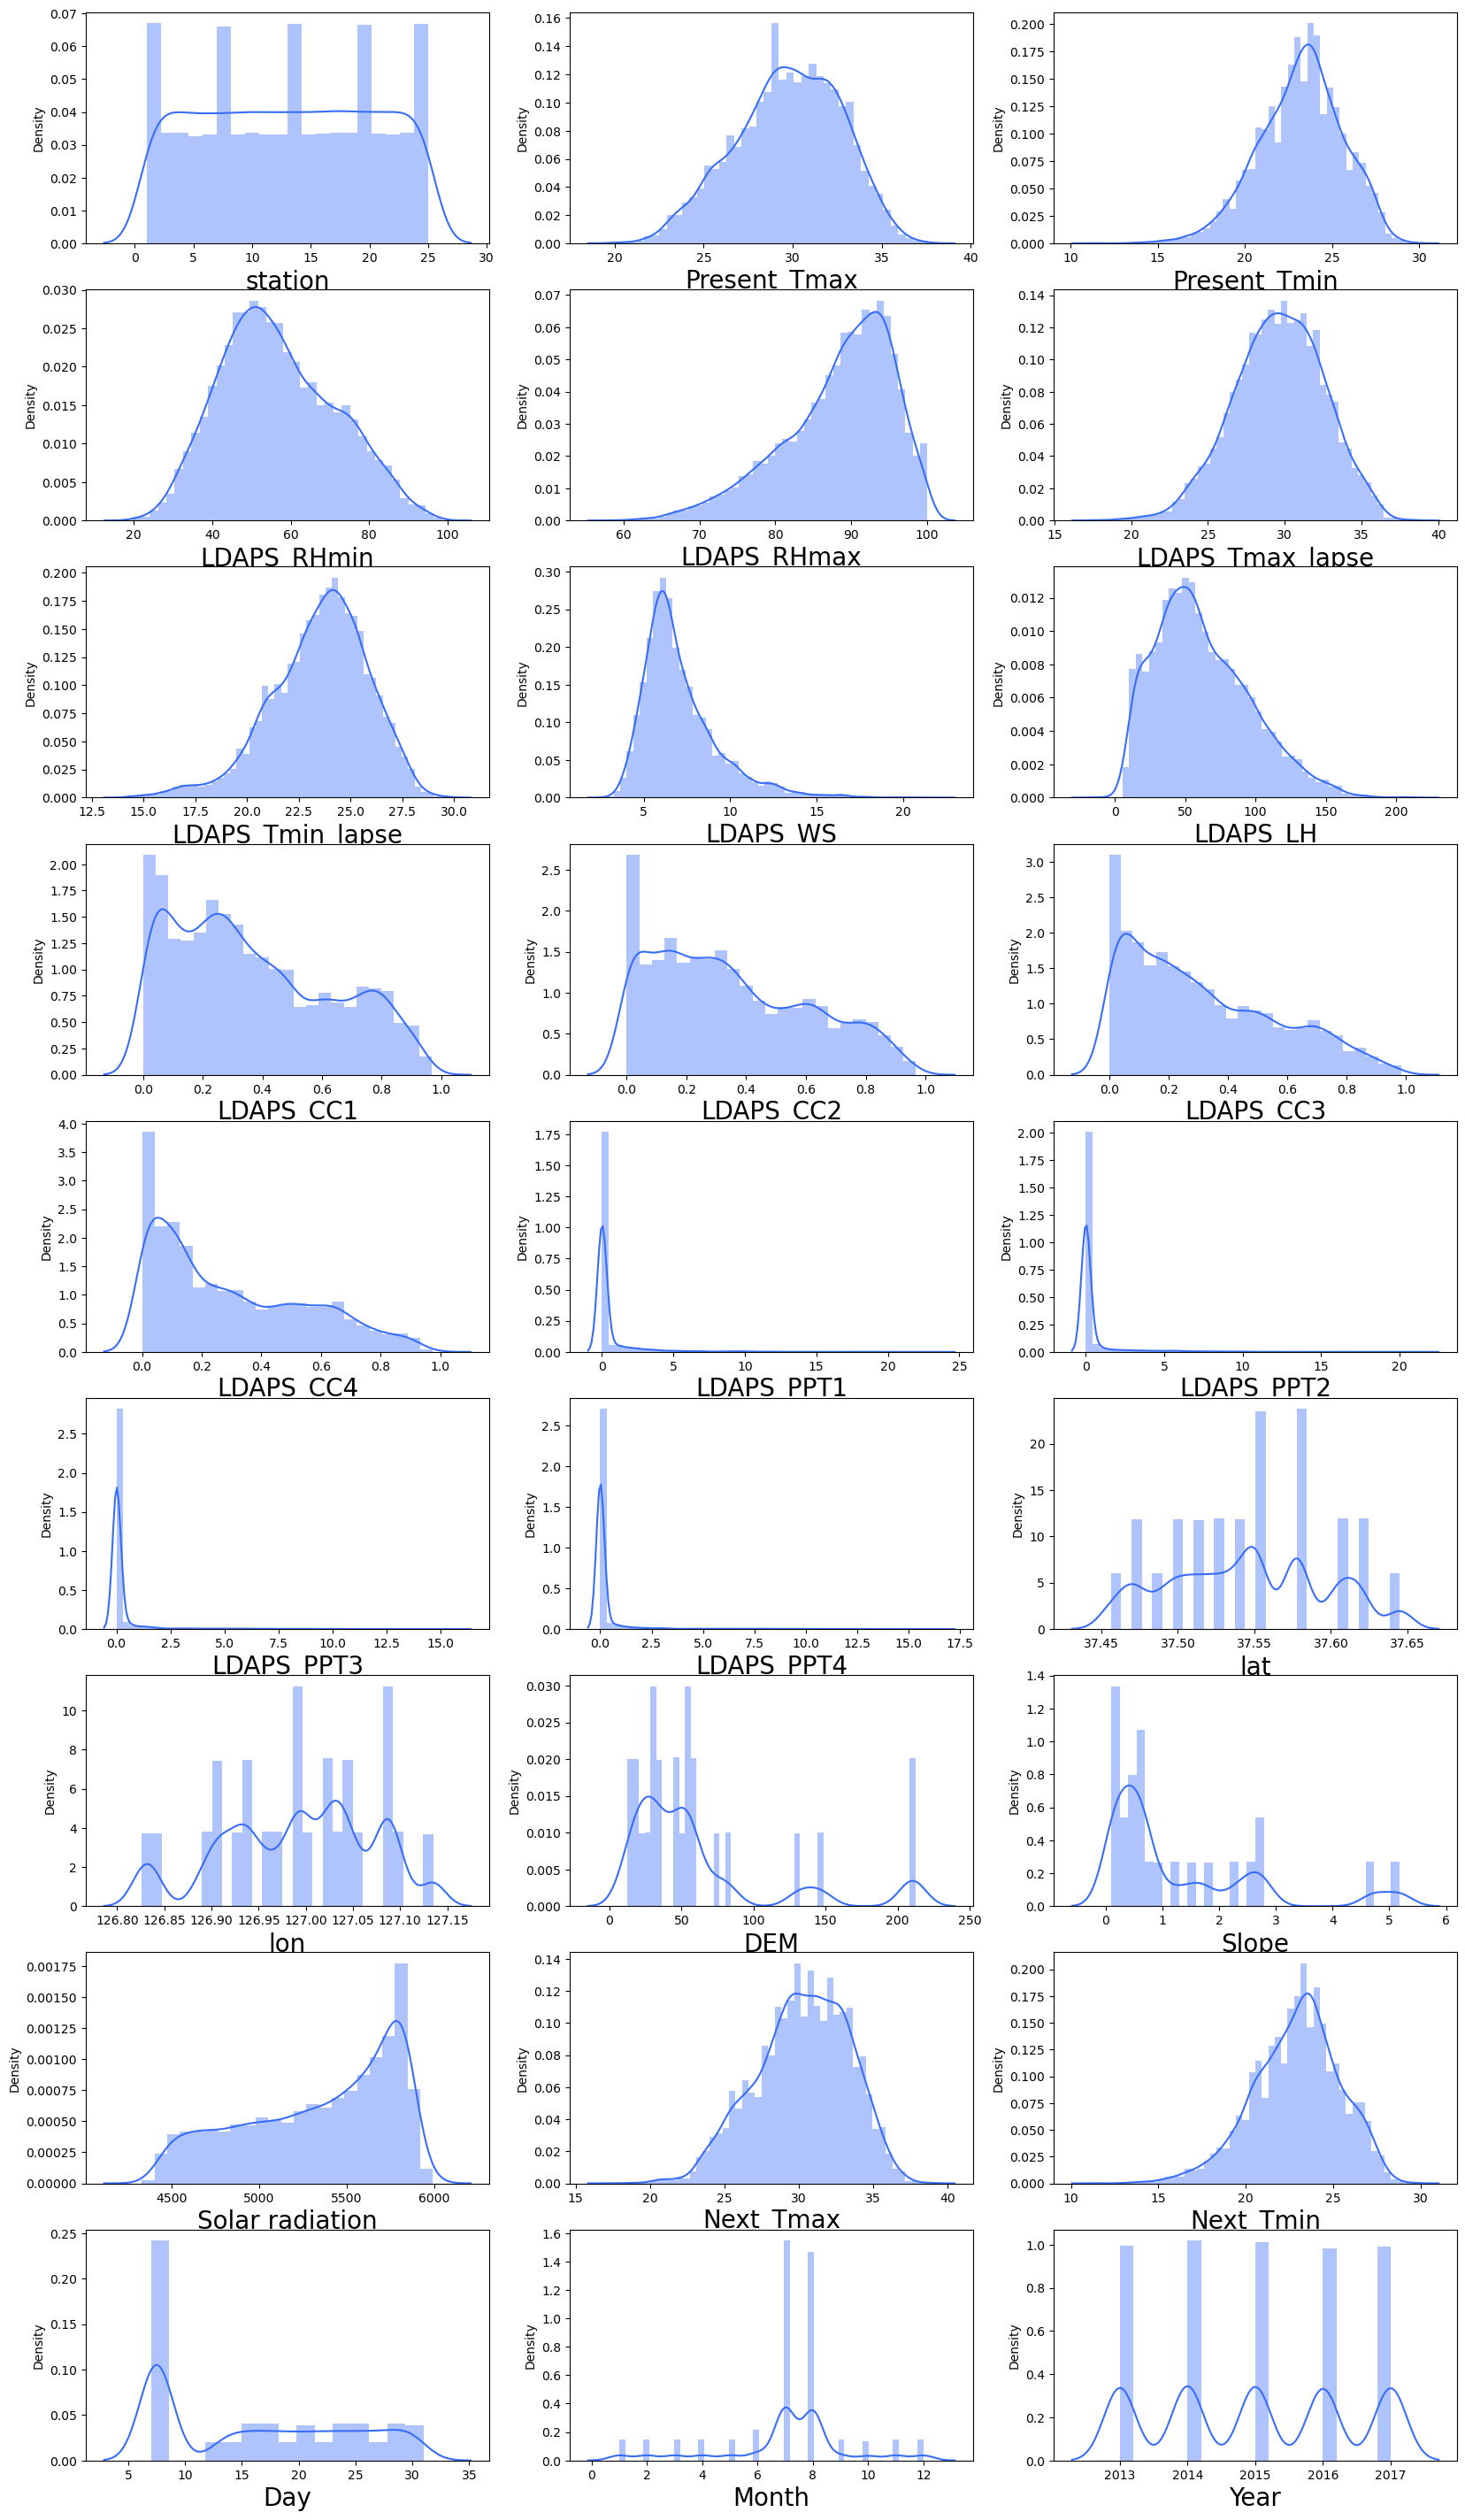

In [356]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Correlation

In [358]:
cor=df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


<Axes: >

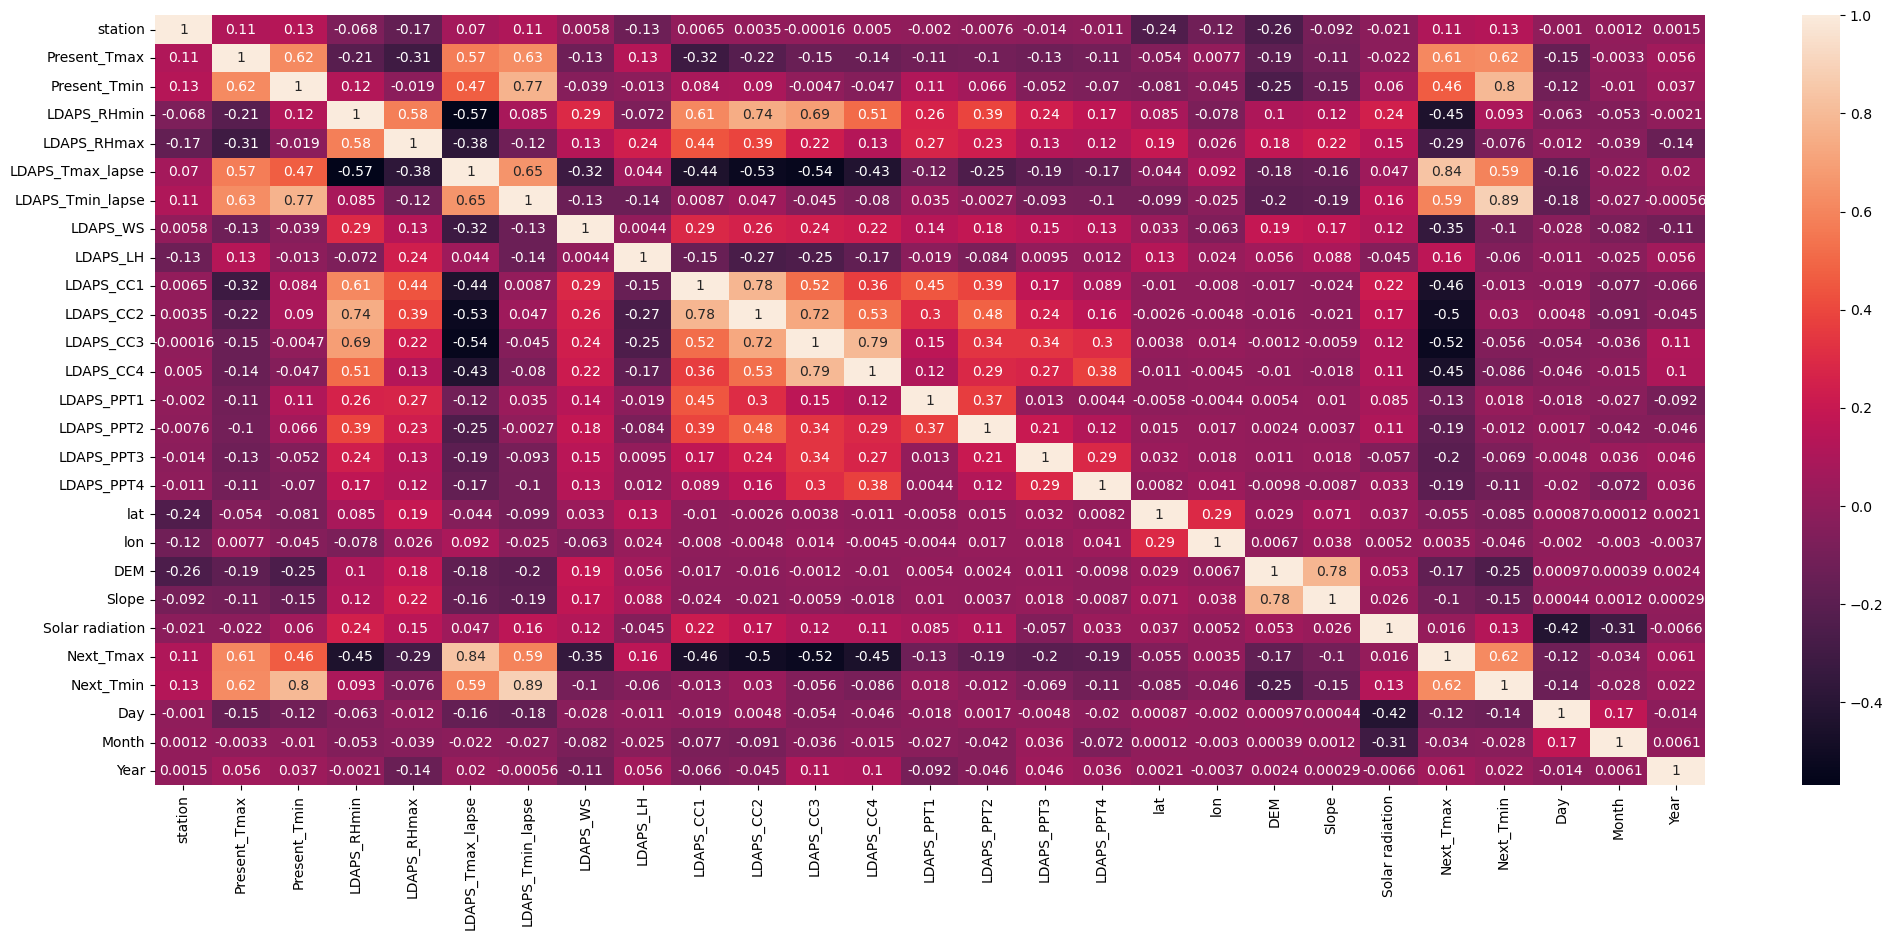

In [359]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

station                Axes(0.125,0.825775;0.227941x0.0542254)
Present_Tmax        Axes(0.398529,0.825775;0.227941x0.0542254)
Present_Tmin        Axes(0.672059,0.825775;0.227941x0.0542254)
LDAPS_RHmin            Axes(0.125,0.760704;0.227941x0.0542254)
LDAPS_RHmax         Axes(0.398529,0.760704;0.227941x0.0542254)
LDAPS_Tmax_lapse    Axes(0.672059,0.760704;0.227941x0.0542254)
LDAPS_Tmin_lapse       Axes(0.125,0.695634;0.227941x0.0542254)
LDAPS_WS            Axes(0.398529,0.695634;0.227941x0.0542254)
LDAPS_LH            Axes(0.672059,0.695634;0.227941x0.0542254)
LDAPS_CC1              Axes(0.125,0.630563;0.227941x0.0542254)
LDAPS_CC2           Axes(0.398529,0.630563;0.227941x0.0542254)
LDAPS_CC3           Axes(0.672059,0.630563;0.227941x0.0542254)
LDAPS_CC4              Axes(0.125,0.565493;0.227941x0.0542254)
LDAPS_PPT1          Axes(0.398529,0.565493;0.227941x0.0542254)
LDAPS_PPT2          Axes(0.672059,0.565493;0.227941x0.0542254)
LDAPS_PPT3             Axes(0.125,0.500423;0.227941x0.0

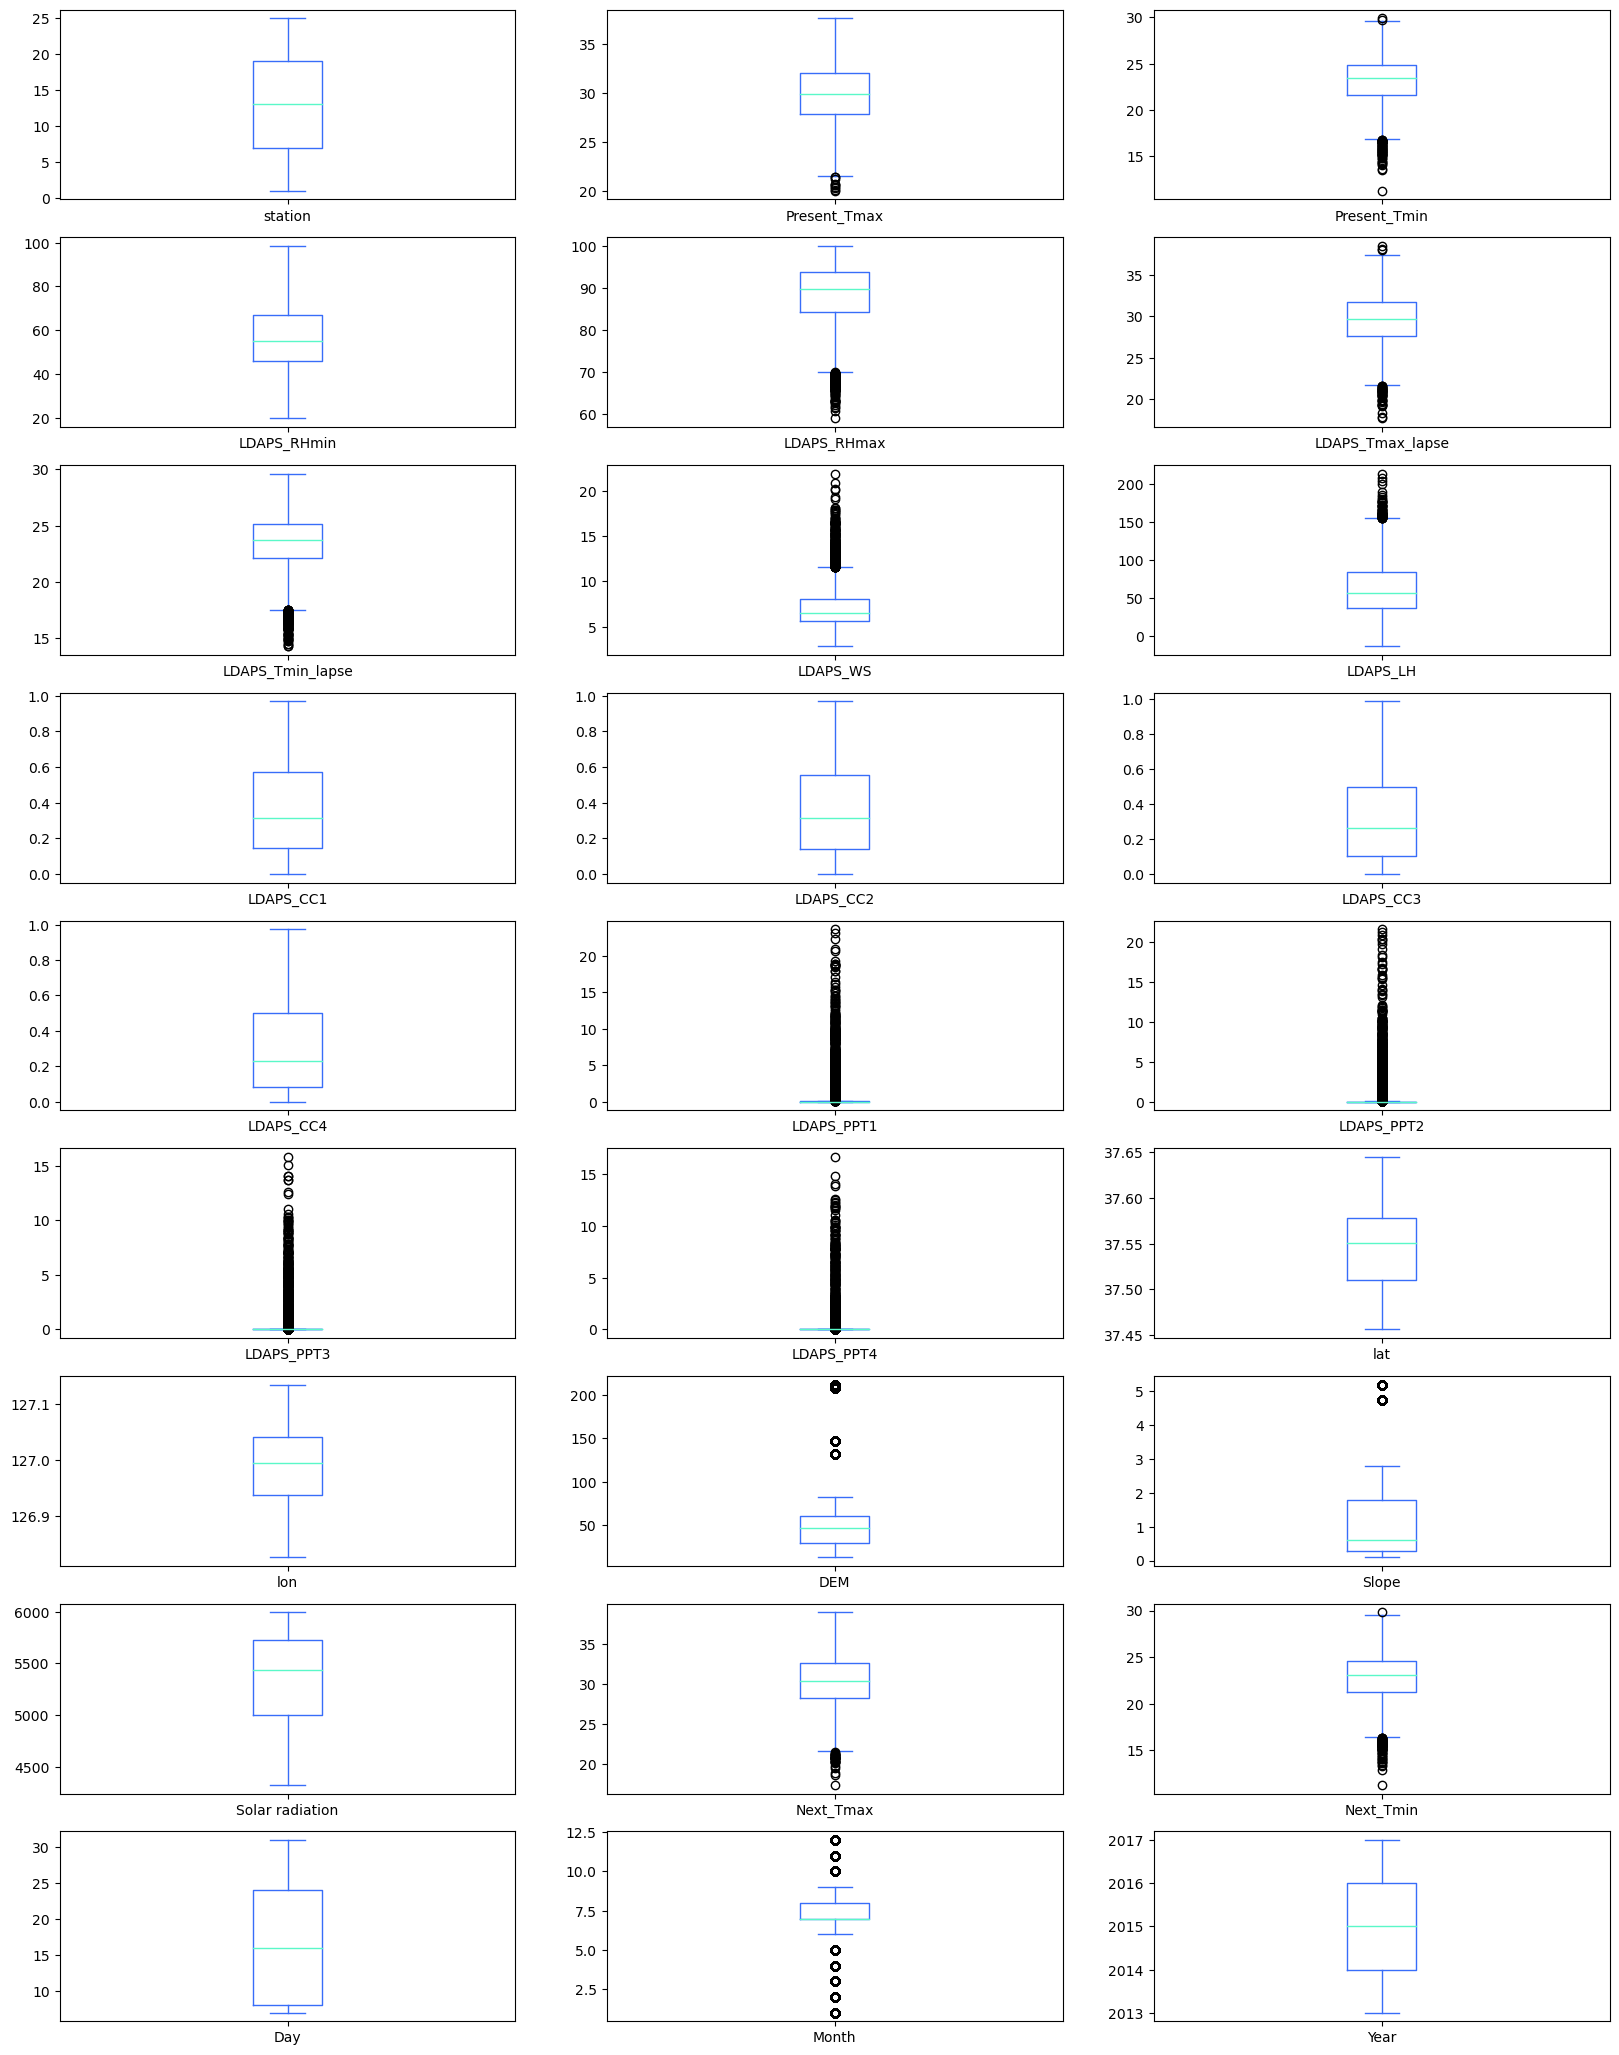

In [360]:
df.plot(kind='box',subplots=True ,layout=(12,3) ,figsize=(20,35))

In [361]:
# Removing Outliers using Z score Method
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.664607,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.513123,...,1.186076,0.005302,2.769091,1.111162,1.510565,0.366861,0.689265,1.662861,0.476369,1.411767
1,1.526052,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.545304,...,1.186076,0.512280,0.315828,0.543220,1.222997,0.083068,0.165513,1.662861,0.476369,1.411767
2,1.387498,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.606944,...,0.650626,0.840503,0.526719,0.723891,1.209602,0.275895,0.398527,1.662861,0.476369,1.411767
3,1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.580143,...,1.987268,0.386040,0.298272,0.928888,1.194265,0.468721,0.559681,1.662861,0.476369,1.411767
4,1.110389,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.827872,...,0.117159,1.812547,0.494848,0.549485,1.200286,0.308032,0.165513,1.662861,0.476369,1.411767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.106481,2.240616,2.247578,2.190405,1.402898,0.614083,2.223667,0.225479,1.569844,1.203497,...,0.117159,0.613271,0.655747,0.500966,2.065599,0.848928,2.099366,1.662861,0.415596,1.423537
7746,1.245036,2.442826,2.414195,1.820788,0.648815,0.990460,2.432415,0.609132,0.583486,1.151793,...,0.686016,1.193973,0.735482,0.820711,2.098689,0.720377,2.341098,1.662861,0.415596,1.423537
7747,1.383590,2.173212,2.539157,2.050081,1.318376,1.110333,2.021883,0.434188,0.283984,1.290699,...,0.150566,1.267697,0.852919,0.804538,2.095175,0.623964,1.938212,1.662861,0.415596,1.423537
7748,1.522145,2.173212,2.289232,2.234735,1.537141,0.886737,2.039881,0.253241,0.452772,1.268430,...,0.418291,1.040466,0.821476,0.755800,2.106671,0.527550,1.656192,1.662861,0.415596,1.423537


In [362]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [363]:
df1.shape

(6739, 27)

In [364]:
df=df1.copy()
df.shape

(6739, 27)

# Skewness

In [366]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

array([[<Axes: title={'center': 'station'}>,
        <Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>],
       [<Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>,
        <Axes: title={'center': 'LDAPS_CC1'}>],
       [<Axes: title={'center': 'LDAPS_CC2'}>,
        <Axes: title={'center': 'LDAPS_CC3'}>,
        <Axes: title={'center': 'LDAPS_CC4'}>,
        <Axes: title={'center': 'LDAPS_PPT1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>],
       [<Axes: title={'center': 'LDAPS_PPT3'}>,
        <Axes: title={'center': 'LDAPS_PPT4'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>],
       [<Axes: title={'center': 'Slope'}>,
        <Axes: 

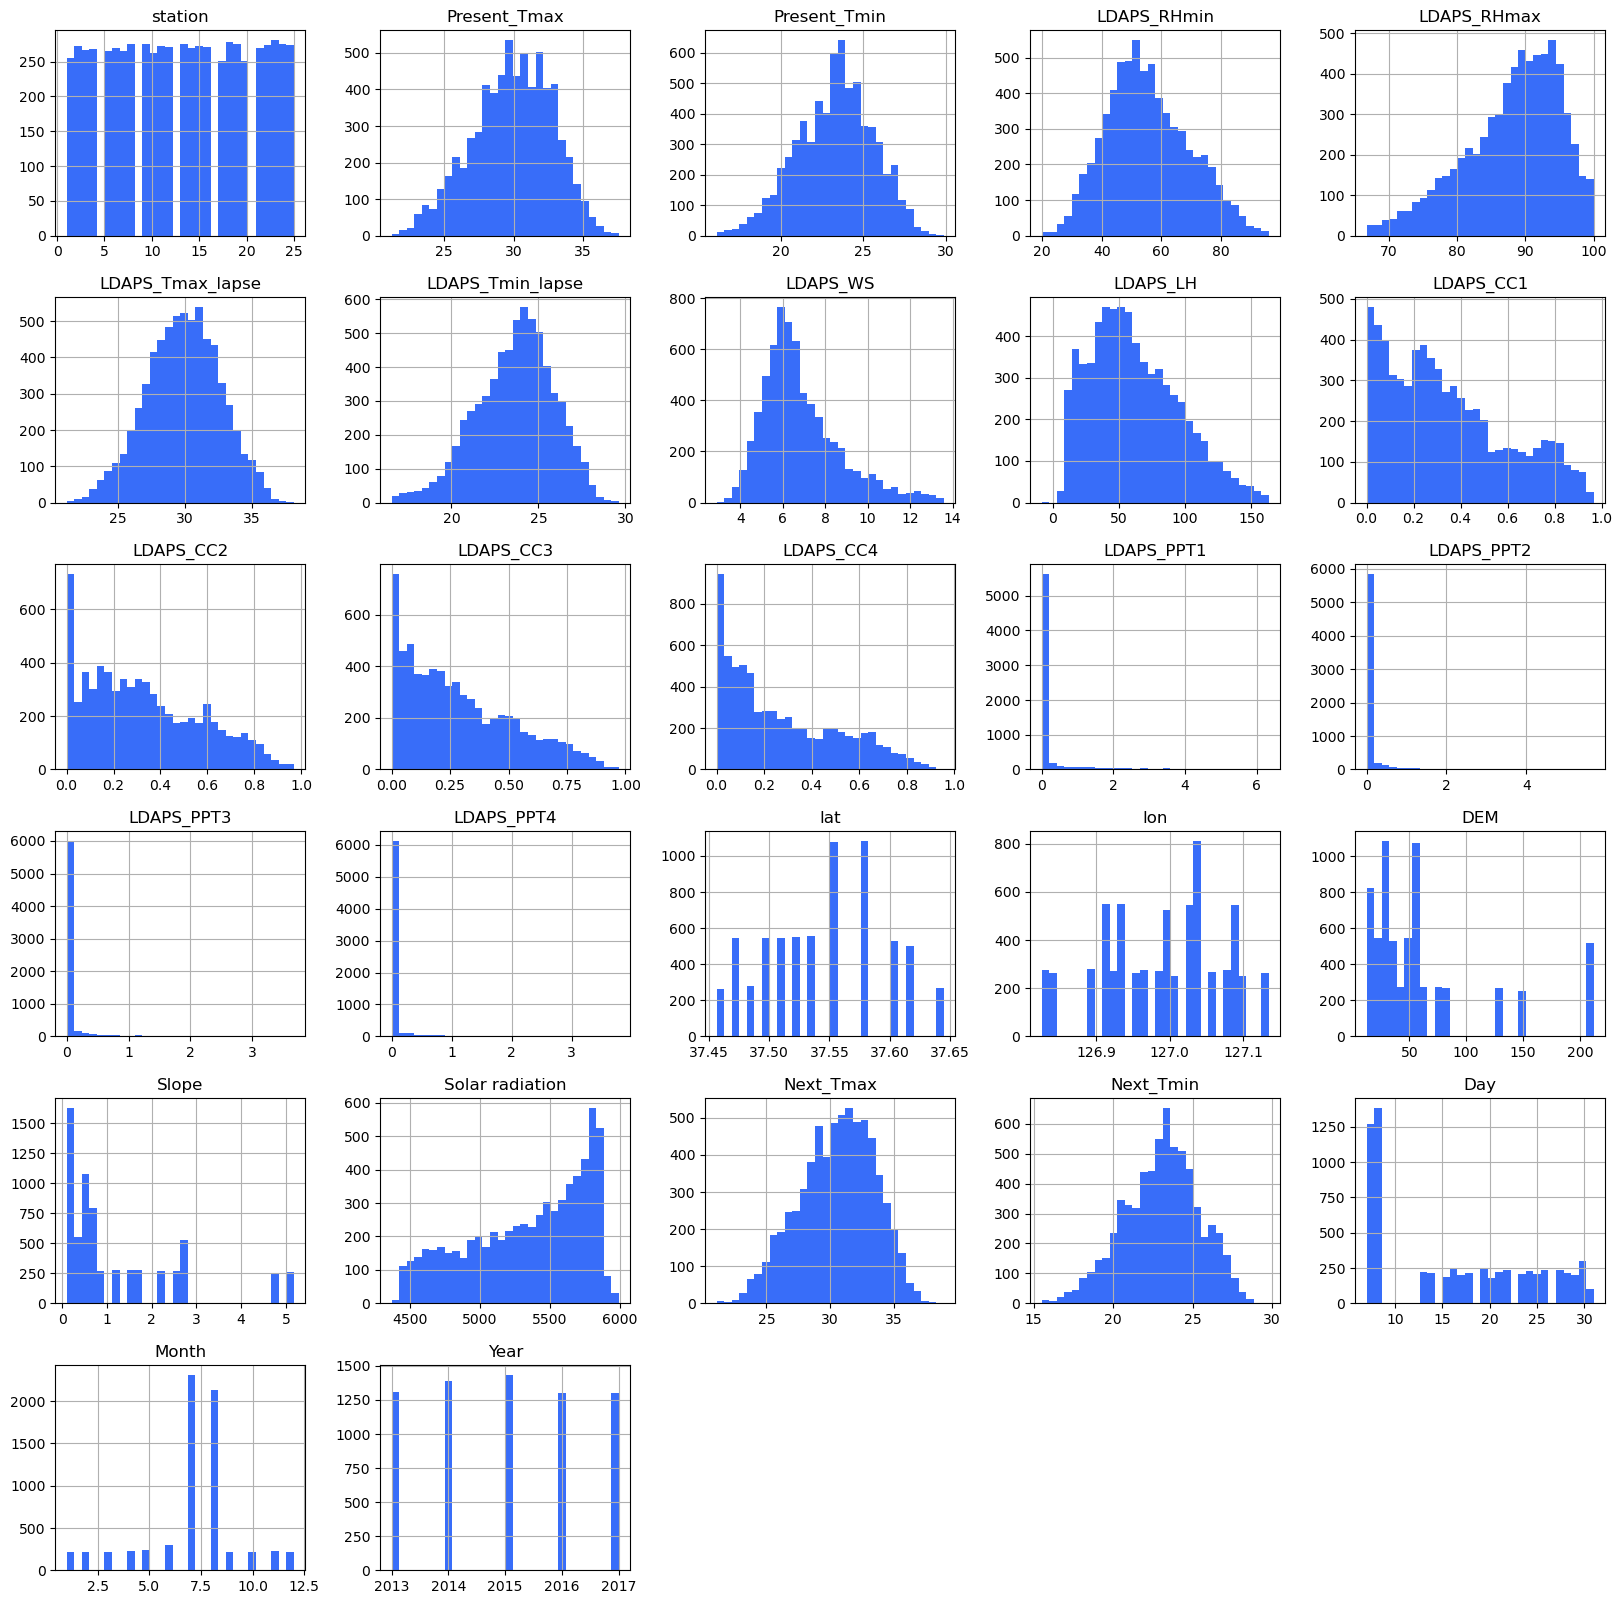

In [367]:
df.hist(bins=30,figsize=(20,20))

In [368]:
# Using logp1 method
for i in df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [369]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.473278
LDAPS_LH           -0.616039
LDAPS_CC1           0.329077
LDAPS_CC2           0.505774
LDAPS_CC3           0.440898
LDAPS_CC4           0.495420
LDAPS_PPT1          2.745464
LDAPS_PPT2          3.637804
LDAPS_PPT3          4.231731
LDAPS_PPT4          4.602734
lat                 0.106983
lon                -0.277547
DEM                 0.450739
Slope               0.845591
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [371]:
df=df.dropna()

# Machine Learning Model Building


In [384]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Prediction of Next_Tmax

In [374]:
x=df.drop(['Next_Tmax'], axis=1)
y=df['Next_Tmax']

In [375]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.210218,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.203356,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.190078,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.195873,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.140985,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.051550,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.064346,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.029592,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035245,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,18.8,30,8,2017


In [376]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6738, dtype: float64

In [377]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5390, 26)
(5390,)
(1348, 26)
(1348,)


# Using Linear Regression

In [378]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [379]:
lr.coef_

array([ 1.94175994e-02,  1.45665248e-01, -4.72048265e-02,  1.16702832e-02,
       -1.15214740e-02,  5.52195711e-01, -1.92932034e-01, -1.40661695e+00,
        3.93668461e-01, -7.52255988e-01, -9.75540963e-01, -9.50149163e-01,
       -2.25491765e+00, -2.97464208e-01,  2.46477649e-01, -2.54175655e-01,
        8.22124990e-01, -5.73342232e-02, -1.68360880e+00,  1.32426811e-01,
       -5.31899668e-02,  1.31343329e-04,  4.51365420e-01,  1.66444460e-03,
       -3.53948736e-02,  6.66918365e-02])

In [380]:
lr.intercept_

88.2199169916114

In [385]:
# lrpred=lr.predict(x_test)
print("Predicted Value", lrpred)
print("Actual Value", y_test)

Predicted Value [29.74678048 27.68464591 27.24381501 ... 33.66787766 29.49919729
 32.85190689]
Actual Value 491     30.9
2866    29.0
3277    25.3
2344    35.1
2521    31.2
        ... 
5320    29.2
6096    29.2
1257    33.0
3213    29.2
4285    32.6
Name: Next_Tmax, Length: 1348, dtype: float64


In [383]:
print('Mean Squared Error:', mse(y_test, lrpred))
print('Mean Absolute Error:', mae(y_test, lrpred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, lrpred)))
print('R2 Score:', r2_score(y_test, lrpred))

Mean Squared Error: 1.988013857172523
Mean Absolute Error: 1.0855032570098835
Root Mean Squared Error: 1.4099694525671551
R2 Score: 0.7598433850647592


# Decision Tree Regressor

In [386]:
dtc=DecisionTreeRegressor()

In [387]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [388]:
pred=dtc.predict(x_test)

In [389]:
print('Mean Squared Error:', mse(y_test, pred))
print('Mean Absolute Error:', mae(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, pred)))
print('R2 Score:', r2_score(y_test, pred))

Mean Squared Error: 1.9292284866468843
Mean Absolute Error: 1.0078635014836794
Root Mean Squared Error: 1.3889666974578203
R2 Score: 0.7669447921008401


# Random Forest Regressor

In [390]:
rfc=RandomForestRegressor()

In [391]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [392]:
pred=rfc.predict(x_test)

In [393]:
print('Mean Squared Error:', mse(y_test, pred))
print('Mean Absolute Error:', mae(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mse(y_test, pred)))
print('R2 Score:', r2_score(y_test, pred))

Mean Squared Error: 0.8895790615727001
Mean Absolute Error: 0.7073167655786352
Root Mean Squared Error: 0.9431749898999126
R2 Score: 0.892536817400047


# Saving Model

In [394]:
import joblib
joblib.dump(rfc,'tempforcast_Tmin.obj')

['tempforcast_Tmin.obj']

# Prediction of Next_Tmin

In [395]:
X=df.drop(['Next_Tmin'], axis=1)
Y=df['Next_Tmin']

In [396]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.210218,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.203356,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.190078,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.195873,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.140985,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.051550,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.064346,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.029592,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035245,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,30,8,2017


In [397]:
Y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6738, dtype: float64

In [398]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=42, test_size=.30)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4716, 26)
(4716,)
(2022, 26)
(2022,)


# Using Linear Regression

In [400]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [401]:
LR.coef_

array([-5.58802819e-03,  3.47038399e-02,  1.99731044e-01,  1.84835481e-02,
        7.00726330e-03, -1.44582138e-02,  5.69039451e-01,  8.19376674e-01,
        1.41751954e-03,  1.05294426e-01,  5.88649798e-01, -1.49412368e-01,
        4.78325875e-01, -2.17037136e-01, -3.30464507e-01,  1.84149403e-01,
       -6.78179332e-01, -9.51880420e-01,  5.99625038e-01, -5.52527681e-01,
        5.06819924e-01,  1.59623309e-05,  2.15306458e-01,  1.05920223e-02,
       -5.42358688e-03,  4.74296397e-03])

In [402]:
LR.intercept_

-54.07683939146213

In [403]:
LRpred=LR.predict(X_test)
print("Predicted Value", LRpred)
print("Actual Value", Y_test)

Predicted Value [23.68325527 20.40798686 21.0115908  ... 21.33094533 26.46534439
 20.00423455]
Actual Value 491     22.0
2866    19.3
3277    19.7
2344    23.7
2521    21.9
        ... 
4416    20.3
1824    23.0
5110    20.1
3881    26.2
2655    21.4
Name: Next_Tmin, Length: 2022, dtype: float64


In [404]:
print('Mean Squared Error:', mse(Y_test, LRpred))
print('Mean Absolute Error:', mae(Y_test, LRpred))
print('Root Mean Squared Error:', np.sqrt(mse(Y_test, LRpred)))
print('R2 Score:', r2_score(Y_test, LRpred))

Mean Squared Error: 0.8937242093516701
Mean Absolute Error: 0.7513944308049331
Root Mean Squared Error: 0.9453698796511713
R2 Score: 0.8365359603030708


# Decision Tree Regressor

In [405]:
DTC=DecisionTreeRegressor()

In [406]:
DTC.fit(X_train,Y_train)

DecisionTreeRegressor()

In [408]:
dtpred=DTC.predict(X_test)

In [410]:
print('Mean Squared Error:', mse(Y_test, dtpred))
print('Mean Absolute Error:', mae(Y_test, dtpred))
print('Root Mean Squared Error:', np.sqrt(mse(Y_test, dtpred)))
print('R2 Score:', r2_score(Y_test, dtpred))

Mean Squared Error: 1.2794362017804157
Mean Absolute Error: 0.8378832838773492
Root Mean Squared Error: 1.1311216564898825
R2 Score: 0.7659884247409624


# Random Forest Regressor

In [411]:
RFC=RandomForestRegressor()

In [412]:
RFC.fit(X_train,Y_train)

RandomForestRegressor()

In [413]:
rfpred=RFC.predict(X_test)

In [414]:
print('Mean Squared Error:', mse(Y_test, rfpred))
print('Mean Absolute Error:', mae(Y_test, rfpred))
print('Root Mean Squared Error:', np.sqrt(mse(Y_test, rfpred)))
print('R2 Score:', r2_score(Y_test, rfpred))

Mean Squared Error: 0.5704888348170136
Mean Absolute Error: 0.5793244312561824
Root Mean Squared Error: 0.755307112913028
R2 Score: 0.8956563909029248


# Saving Model

In [415]:
import joblib
joblib.dump(RFC,'tempforcast_Tmax.obj')

['tempforcast_Tmax.obj']